In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:

# Loading and Visulaizing the columns of purchased behaviour of customer

purchase = pd.read_csv("C:/Users/sowba/Downloads/purchase_behaviour.csv")

(list(purchase.columns))


['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']

In [18]:

# Visualizing the data

(purchase.head())


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [19]:

# Checking for any missing values

(purchase.isnull().sum())


LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [20]:

# Loading and Visulaizing the columns of transactions data

transactions = pd.read_csv("C:/Users/sowba/Downloads/transaction_data.csv")

(list(transactions.columns))


['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES']

In [21]:

# Visualizing the data

print(transactions.head())


    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [22]:

# Checking for any missing values

print(transactions.isnull().sum())


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [24]:

# Merging both the csv files to find the Best selling products and Profitable Customers

merged_df = transactions.merge(purchase, on="LYLTY_CARD_NBR", how="left")


In [25]:

# Visualizing the merged data

(merged_df.head())


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [26]:
# Aggregating total sales by customer segment

segment_sales = merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

segment_sales


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,81958.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


In [27]:

# Sorting in descending order to get the profitable customer segment

segment_sales = segment_sales.sort_values(by="TOT_SALES", ascending=False)

# Display the top 3 segment

(segment_sales.head(3))


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,168363.25
19,YOUNG SINGLES/COUPLES,Mainstream,157621.60
13,RETIREES,Mainstream,155677.05


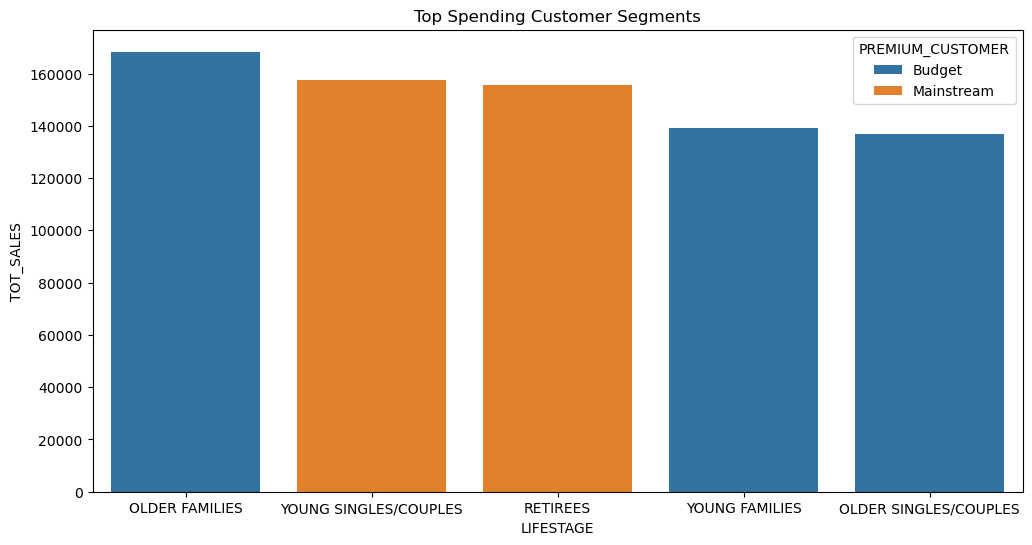

In [28]:
# Visualizing through bar plot

plt.figure(figsize=(12, 6))

sns.barplot(data=segment_sales.head(5), x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER")

plt.title("Top Spending Customer Segments")

plt.xticks(rotation=0)

plt.show()

In [29]:

# Identifying the best selling products

product_sales = merged_df.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index()

product_sales


,PROD_NAME,TOT_SALES
0,Burger Rings 220g,6831.0
1,CCs Nacho Cheese 175g,5961.9
2,CCs Original 175g,6048.0
3,CCs Tasty Cheese 175g,6069.0
4,Cheetos Chs & Bacon Balls 190g,9243.3
...,...,...
109,WW Sour Cream &OnionStacked Chips 160g,5323.8
110,WW Supreme Cheese Corn Chips 200g,5390.3
111,Woolworths Cheese Rings 190g,5169.6
112,Woolworths Medium Salsa 300g,4050.0


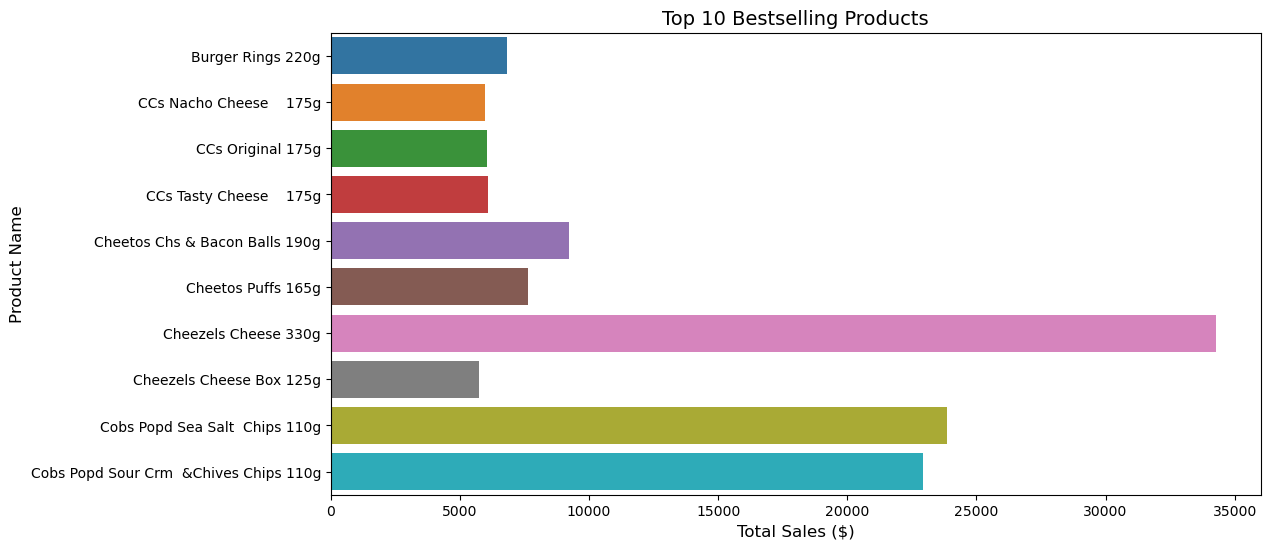

In [39]:
plt.figure(figsize=(12, 6))  # Set figure size
sns.barplot(data=product_sales.head(10), x="TOT_SALES", y="PROD_NAME",hue="PROD_NAME")

plt.title("Top 10 Bestselling Products", fontsize=14)
plt.xlabel("Total Sales ($)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)

plt.show()


In [40]:
# Sorting in descending order to find top 3 products

top_products = product_sales.sort_values(by="TOT_SALES", ascending=False)

# Display top 3 products

(top_products.head(3))

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


In [41]:

customer_sales = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()

top_products_per_segment = customer_sales.sort_values(by='TOT_SALES', ascending=False)

top_products_per_segment.head(15)


,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME,TOT_SALES
2177,YOUNG SINGLES/COUPLES,Mainstream,Dorito Corn Chp Supreme 380g,3659.50
2252,YOUNG SINGLES/COUPLES,Mainstream,Smiths Crnkle Chip Orgnl Big Bag 380g,3516.40
2199,YOUNG SINGLES/COUPLES,Mainstream,Kettle Mozzarella Basil & Pesto 175g,3380.40
2243,YOUNG SINGLES/COUPLES,Mainstream,Smiths Crinkle Chips Salt & Vinegar 330g,3317.40
761,OLDER FAMILIES,Budget,Smiths Crinkle Chips Salt & Vinegar 330g,3186.30
2178,YOUNG SINGLES/COUPLES,Mainstream,Doritos Cheese Supreme 330g,3186.30
695,OLDER FAMILIES,Budget,Dorito Corn Chp Supreme 380g,3123.25
690,OLDER FAMILIES,Budget,Cheezels Cheese 330g,3095.10
2172,YOUNG SINGLES/COUPLES,Mainstream,Cheezels Cheese 330g,3089.40
2205,YOUNG SINGLES/COUPLES,Mainstream,Kettle Sweet Chilli And Sour Cream 175g,3088.80


In [33]:
# Filter to get top 3 products by customer segment
top_3_products_per_segment = customer_sales.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).head(3)

# Preview the top 3 products per segment
top_3_products_per_segment.head(15)


,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,Burger Rings 220g,193.2
1,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese 175g,157.5
2,MIDAGE SINGLES/COUPLES,Budget,CCs Original 175g,111.3
114,MIDAGE SINGLES/COUPLES,Mainstream,Burger Rings 220g,211.6
115,MIDAGE SINGLES/COUPLES,Mainstream,CCs Nacho Cheese 175g,254.1
116,MIDAGE SINGLES/COUPLES,Mainstream,CCs Original 175g,207.9
228,MIDAGE SINGLES/COUPLES,Premium,Burger Rings 220g,255.3
229,MIDAGE SINGLES/COUPLES,Premium,CCs Nacho Cheese 175g,226.8
230,MIDAGE SINGLES/COUPLES,Premium,CCs Original 175g,231.0
342,NEW FAMILIES,Budget,Burger Rings 220g,69.0


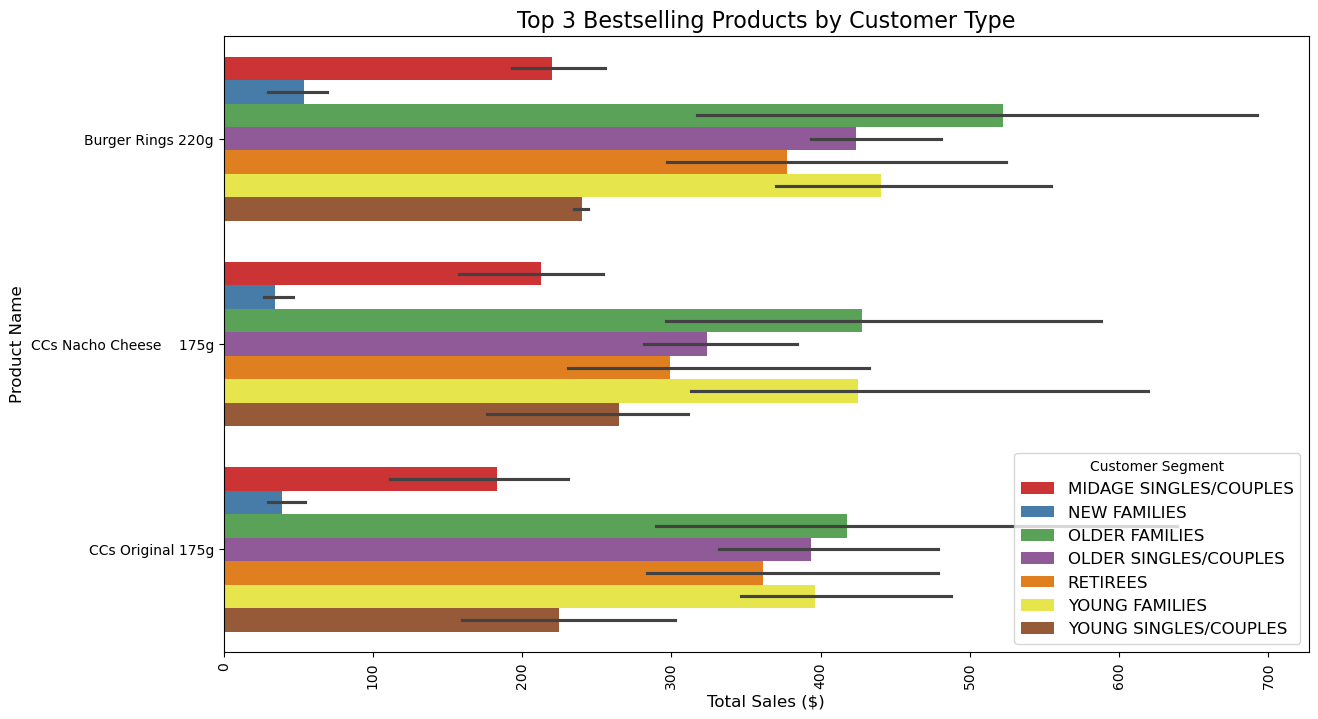

In [34]:



# Bar plot for the top-selling products by customer segment

plt.figure(figsize=(14, 8))
sns.barplot(data=top_3_products_per_segment, x="TOT_SALES", y="PROD_NAME", hue="LIFESTAGE", dodge=True, palette="Set1")
plt.title("Top 3 Bestselling Products by Customer Type", fontsize=16)
plt.xlabel("Total Sales ($)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Customer Segment", fontsize=12)
plt.show()


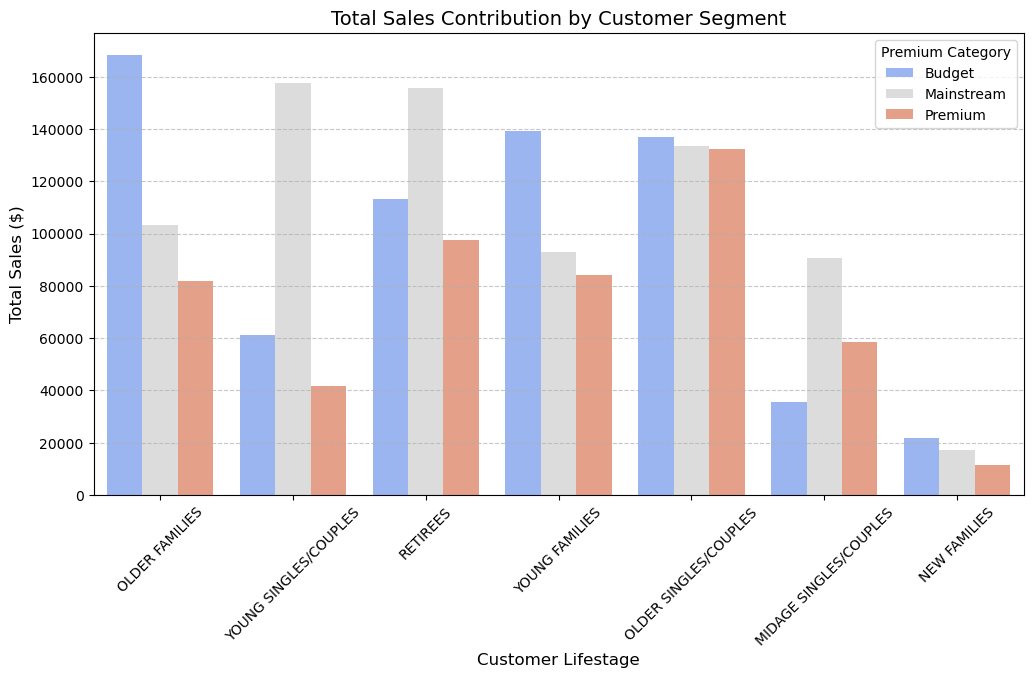

In [38]:

# Total Sales Vs Customer Segment 

sales_summary = merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

sales_summary = sales_summary.sort_values(by="TOT_SALES", ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=sales_summary, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", palette="coolwarm")
plt.title("Total Sales Contribution by Customer Segment", fontsize=14)
plt.xlabel("Customer Lifestage", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Premium Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# Analysis

#     * Older Families & Retirees – Prefer bulk purchases due to habitual buying behavior.
    
#     * Premium Customers – Favor high-end, gourmet products and exhibit strong brand loyalty.
    
#     * Young Singles & Couples – Display trend-driven, impulse buying but lower long-term loyalty.